### Please implement the code from this blogpost in this notebook: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

## import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

## create dataframe

In [2]:
years_of_experience = list(range(1,11))
salary = [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]
d = {'years_of_experience': years_of_experience, 'salary' : salary}

In [3]:
df = pd.DataFrame(d)

In [4]:
df.columns

Index(['years_of_experience', 'salary'], dtype='object')

In [5]:
df

,years_of_experience,salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


## linear regression

In [6]:
y = df.salary.values
X = df.drop('salary', axis = 1)

In [7]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle = False)
X_train.drop('salary', axis = 1, inplace = True)
X_test.drop('salary', axis = 1, inplace = True)

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)

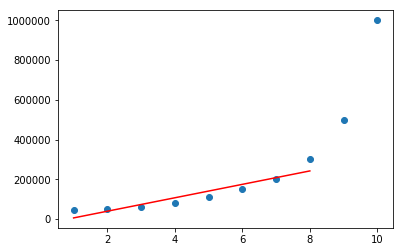

In [9]:
plt.scatter(X, y)
plt.plot(X_train, y_pred, color = "red")

## Polynomial Regression

In [10]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
regr2 = linear_model.LinearRegression()
regr2.fit(x_poly, y_train)
y_poly_pred = regr2.predict(x_poly)

In [11]:
X_train

,years_of_experience
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


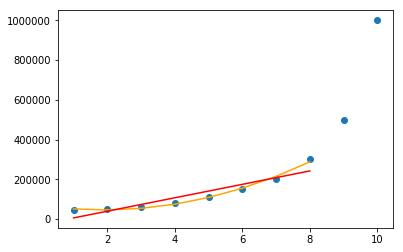

In [12]:
#plot
plt.scatter(X, y)
plt.plot(X_train, y_poly_pred, color = "orange")
plt.plot(X_train, y_pred, color = "red")

In [13]:
rmse_poly_train = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2_poly_train = r2_score(y_train, y_poly_pred)
print('RMSE_poly_train: ', rmse_poly_train)
print('r2_poly_train: ', r2_poly_train)

RMSE_poly_train:  8092.885249814599
r2_poly_train:  0.9905374644919765


In [14]:
rmse_lin_train = np.sqrt(mean_squared_error(y_train,y_pred))
r2_lin_train = r2_score(y_train, y_pred)
print('RMSE_lin_train: ', rmse_lin_train)
print('r2_lin_train: ', r2_lin_train)

RMSE_lin_train:  30682.344271583945
r2_lin_train:  0.8639878096958068


### predict for test_data

In [15]:
y_pred_test = regr.predict(X_test)
x_poly_test = polynomial_features.fit_transform(X_test)
y_poly_pred_test = regr2.predict(x_poly_test)

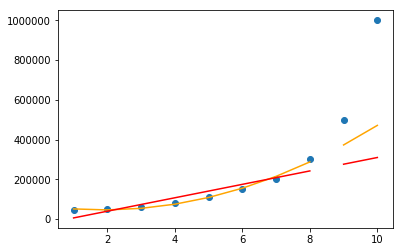

In [16]:
plt.scatter(X, y)
plt.plot(X_train, y_poly_pred, color = "orange")
plt.plot(X_train, y_pred, color = "red")
plt.plot(X_test, y_poly_pred_test, color = "orange")
plt.plot(X_test, y_pred_test, color = "red")

In [17]:
rmse_poly_test = np.sqrt(mean_squared_error(y_test,y_poly_pred_test))
r2_poly_test = r2_score(y_test, y_poly_pred_test)
print('RMSE_poly_test: ', rmse_poly_test)
print('r2_poly_test: ', r2_poly_test)

RMSE_poly_test:  384352.4157773554
r2_poly_test:  -1.3636284722222247


In [18]:
rmse_lin_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
r2_lin_test = r2_score(y_test, y_pred_test)
print('RMSE_lin_test: ', rmse_lin_test)
print('r2_lin_test: ', r2_lin_test)

RMSE_lin_test:  512915.2281322909
r2_lin_test:  -3.2093125000000002
